# Pass Network

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer import Pitch
%matplotlib inline

In [2]:
with open('C:\\Users\\marwane\\Documents\\Data Science\\events_19769.json',encoding="utf-8") as data:
    events = json.load(data)

In [3]:
import pprint

In [8]:
def lineup(file):     
    
    players = []

    for i in file:        
        players.append(i['player']['name'])
       
    
    return players

In [9]:
lineup = lineup(events[1]['tactics']['lineup'])

In [10]:
lineup

['Anne Moorhouse',
 'Kate Longhurst',
 'Gilly Louise Scarlett Flaherty',
 'Brooke Hendrix',
 'Claire Lauren Rafferty',
 'Lucienne Reichardt',
 'Julia Simic',
 'Brianna Visalli',
 'Alisha Lehmann',
 'Esmee de Graaf',
 'Jane Ross']

In [11]:
events[2]

{'id': 'ecf61eb6-37e5-41da-842b-3a3d0d22bfec',
 'index': 3,
 'period': 1,
 'timestamp': '00:00:00.000',
 'minute': 0,
 'second': 0,
 'type': {'id': 18, 'name': 'Half Start'},
 'possession': 1,
 'possession_team': {'id': 965, 'name': 'Brighton & Hove Albion WFC'},
 'play_pattern': {'id': 1, 'name': 'Regular Play'},
 'team': {'id': 965, 'name': 'Brighton & Hove Albion WFC'},
 'duration': 0.0,
 'related_events': ['6a85f892-4648-4540-91b7-1d0aae2d5cce']}

In [12]:
passes = []
c = 0
for i in events:
    if 'pass' in i.keys():
        passes.append(i)
        c=c+1

c

855

In [13]:
successful_passes = []
c = 0
for i in passes:
    if ('recipient' in i['pass'].keys()) and (i['team']['id'] == 965):
        successful_passes.append(i)
        c = c + 1
        
c

400

### Pass connection dataframe

In [14]:
players = []
x_starts = []
y_starts = []
recipients = []
x_ends = []
y_ends = []

for i in successful_passes:
    players.append(i['player']['name'])
    x_starts.append(i['location'][0])
    y_starts.append(i['location'][1])
    recipients.append(i['pass']['recipient']['name'])
    x_ends.append(i['pass']['end_location'][0])
    y_ends.append(i['pass']['end_location'][1])
    

In [15]:
network = {'Player':players,'X start':x_starts,'Y start':y_starts,'Recipient':recipients,'X end':x_ends,'Y end':y_ends}
    

In [16]:
df = pd.DataFrame(network)

In [17]:
df

,Player,X start,Y start,Recipient,X end,Y end
0,Laura Rafferty,35.0,60.0,Marie Hourihan,14.0,50.0
1,Marie Hourihan,16.0,50.0,Victoria Williams,22.0,17.0
2,Victoria Williams,33.0,18.0,Chloe Peplow,37.0,27.0
3,Chloe Peplow,37.0,27.0,Victoria Williams,30.0,19.0
4,Victoria Williams,31.0,17.0,Iniabasi Anefiok Umotong,68.0,19.0
...,...,...,...,...,...,...
395,Kirsty Barton,49.0,80.0,Kayleigh Green,81.0,73.0
396,Ellie Brazil,65.0,75.0,Laura Rafferty,50.0,67.0
397,Marie Hourihan,6.0,36.0,Kirsty Barton,39.0,63.0
398,Danielle Buet,2.0,71.0,Ellie Brazil,51.0,71.0


### Average position per player

In [30]:
mean_pos = df.groupby(['Player']).mean()
mean_pos

,X start,Y start,X end,Y end
Player,,,,
Aileen Whelan,74.724138,25.379310,84.103448,30.103448
Chloe Peplow,53.432432,39.621622,53.621622,44.837838
Danielle Buet,58.928571,36.428571,79.928571,40.285714
Ellie Brazil,77.782609,64.913043,82.347826,62.391304
Iniabasi Anefiok Umotong,73.625000,35.687500,75.062500,34.000000
Jodie Brett,71.000000,32.588235,70.294118,31.352941
Kayleigh Green,68.200000,57.500000,70.550000,58.750000
Kirsty Barton,52.910448,73.402985,62.388060,63.223881
Laura Rafferty,37.431818,54.181818,50.568182,54.454545


### Number of total pass per player

In [36]:
count_pass = df.groupby(["Player"],as_index=False)["X start"].count()
count_pass.rename({"Player": "Player", "X start" : "Count"}, axis=1,inplace=True)

In [37]:
count_pass

,Player,Count
0,Aileen Whelan,29
1,Chloe Peplow,37
2,Danielle Buet,14
3,Ellie Brazil,23
4,Iniabasi Anefiok Umotong,16
5,Jodie Brett,17
6,Kayleigh Green,40
7,Kirsty Barton,67
8,Laura Rafferty,44
9,Marie Hourihan,27


### Count the number of passes for each pair of players

In [18]:
passes = df.groupby(["Player","Recipient"],as_index=False)["X start"].count()

In [19]:
passes

,Player,Recipient,X start
0,Aileen Whelan,Chloe Peplow,3
1,Aileen Whelan,Danielle Buet,1
2,Aileen Whelan,Ellie Brazil,5
3,Aileen Whelan,Iniabasi Anefiok Umotong,5
4,Aileen Whelan,Jodie Brett,8
...,...,...,...
99,Victoria Williams,Kayleigh Green,7
100,Victoria Williams,Kirsty Barton,4
101,Victoria Williams,Laura Rafferty,2
102,Victoria Williams,Marie Hourihan,3


In [20]:
passes.rename({"Player": "Player", "Recipient": "Recipient","X start" : "Count"}, axis=1,inplace=True)

In [38]:
#Delete all the number of passes that are only equal "1"
for i in range(len(passes)):
    if passes.loc[i,"Count"] == 1:
        passes.drop(i,inplace=True)
    
  

In [39]:
passes

,Player,Recipient,Count
0,Aileen Whelan,Chloe Peplow,3
2,Aileen Whelan,Ellie Brazil,5
3,Aileen Whelan,Iniabasi Anefiok Umotong,5
4,Aileen Whelan,Jodie Brett,8
5,Aileen Whelan,Kayleigh Green,6
...,...,...,...
99,Victoria Williams,Kayleigh Green,7
100,Victoria Williams,Kirsty Barton,4
101,Victoria Williams,Laura Rafferty,2
102,Victoria Williams,Marie Hourihan,3


# Merging dataframes

Merging the **count_pass** & **mean_pos** dataframes to combine the data for better plotting

In [41]:
pos_pass = pd.merge(count_pass,mean_pos,how="outer",on=['Player'])

In [42]:
pos_pass

,Player,Count,X start,Y start,X end,Y end
0,Aileen Whelan,29,74.724138,25.379310,84.103448,30.103448
1,Chloe Peplow,37,53.432432,39.621622,53.621622,44.837838
2,Danielle Buet,14,58.928571,36.428571,79.928571,40.285714
3,Ellie Brazil,23,77.782609,64.913043,82.347826,62.391304
4,Iniabasi Anefiok Umotong,16,73.625000,35.687500,75.062500,34.000000
5,Jodie Brett,17,71.000000,32.588235,70.294118,31.352941
6,Kayleigh Green,40,68.200000,57.500000,70.550000,58.750000
7,Kirsty Barton,67,52.910448,73.402985,62.388060,63.223881
8,Laura Rafferty,44,37.431818,54.181818,50.568182,54.454545
9,Marie Hourihan,27,10.259259,42.074074,33.703704,38.666667


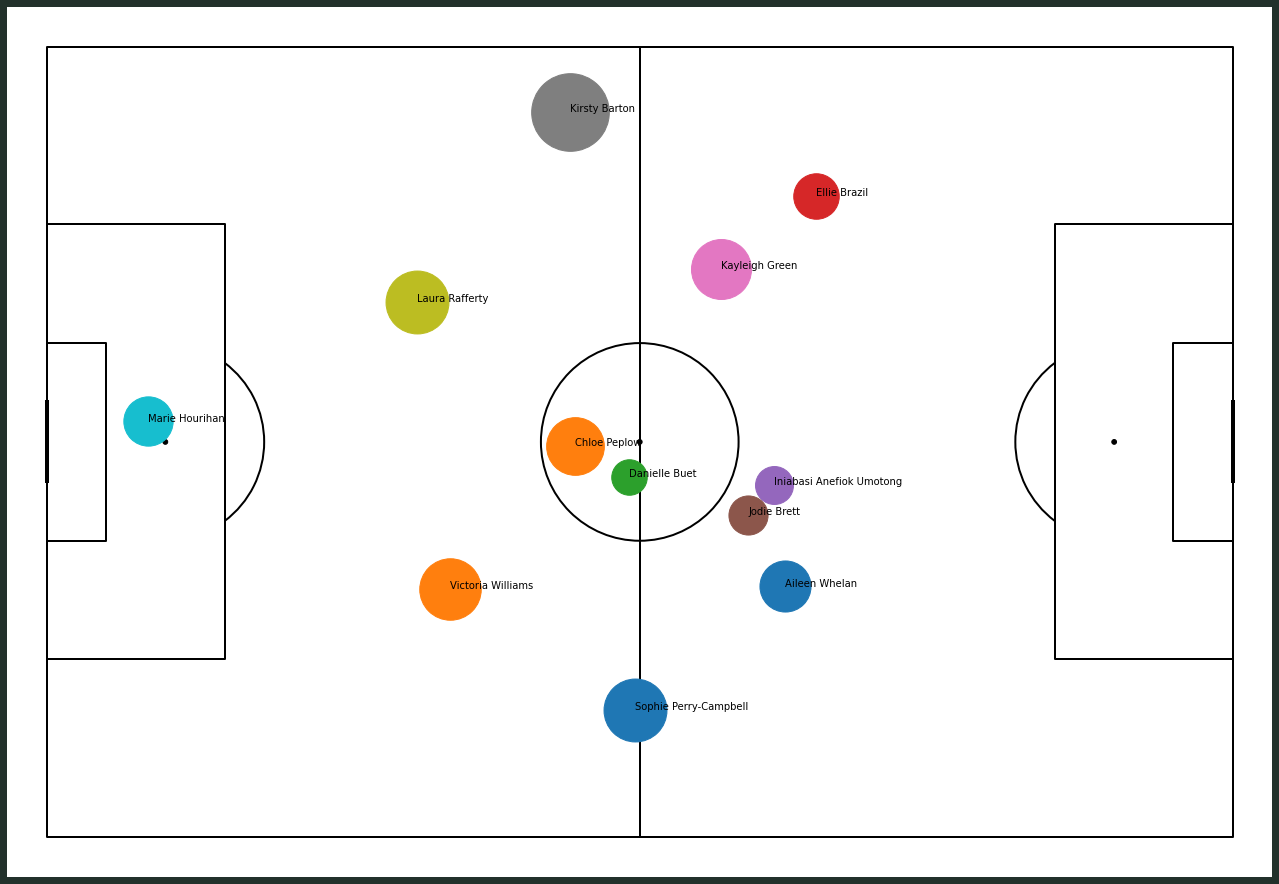

In [73]:
# DRawing the plot
fig,ax = plt.subplots(figsize=(28,16))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#Drawing the pitch over the plot
pitch = Pitch(pitch_color='white',line_color='black',stripe=False)
pitch.draw(ax=ax)

#Invert Y axis
plt.gca().invert_yaxis()


for i, row in pos_pass.iterrows():

    plt.scatter(row['X start'],row['Y start'],s=row['Count']*90,)
    plt.annotate(row['Player'],(row['X start'],row['Y start']))
